In [11]:
# DEFAULT_HOST = "bcd:8080"
DEFAULT_HOST = "bcd.ai-ml-demo.svc.cluster.local"
# DEFAULT_HOST = "bcd-ai-ml-workflows.apps.cluster-plano-4bba.plano-4bba.sandbox1155.opentlc.com"
DEFAULT_BASE_URL = ("http://%s/" % DEFAULT_HOST) + r"%s"

In [12]:
import zipfile
with zipfile.ZipFile("./data.zip", 'r') as zip_ref:
    zip_ref.extractall("./data")

In [13]:
from pickle import load as cPload
from pickle import loads as cPloads
import numpy as np
X = np.load('./data/X.npy') # images
Y = np.load('./data/Y.npy') # images
X = X / 255.0

In [14]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.1, random_state=2)
numberoftrain = xtrain.shape[0]
numberoftest = xtest.shape[0]
xtest.shape
print(len(xtest))

555


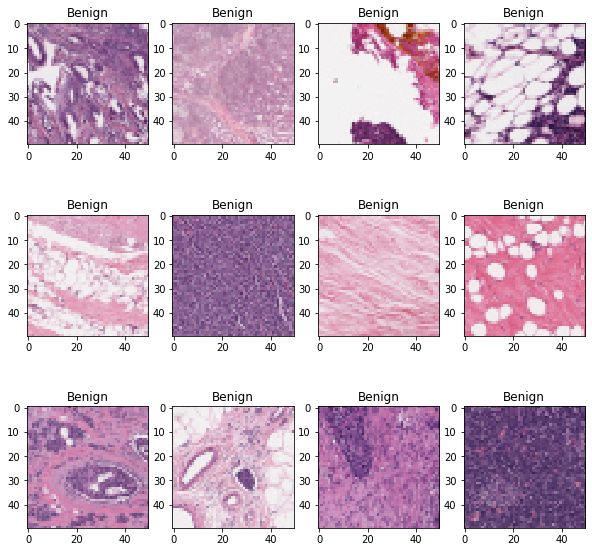

In [15]:
imgsize = 64
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# # Display first 15 images of moles, and how they are classified
w=10
h=10
fig=plt.figure(figsize=(w, h))
columns = 4
rows = 3

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if np.argmax(ytest[i]) == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(xtest[i], interpolation='nearest')
plt.show()

In [16]:
# Saving images from test set for validation purposes
import random
import imageio

from PIL import Image
import os

image_path = "testimages"
# im = Image.fromarray(img_array[0])

name = "test_image"
count = 0
l = xtest.shape[0]

# for i in range(1,5):
#     r = random.randrange(l)
#     filename = name+str(r)+"_"+str(ytest[r])+".png"
#     imageio.imwrite(os.path.join(image_path,filename),xtest[r])


In [17]:

def get_metrics(url = None):
    def parse_one_metric(line):
        ll = line.rsplit(' ', 1)
        return (ll[0], float(ll[1]))
    
    url = (url or (DEFAULT_BASE_URL % "metrics")) 
    response = requests.request("POST", url)
    return dict([parse_one_metric(line) for line in response.text.split('\n') if len(line) > 0 and line[0] != '#'])

In [18]:
import requests
from urllib.parse import urlencode
import json
import numpy as np
import pandas as pd

def get_prediction(imgs, url = None):
    url = (url or (DEFAULT_BASE_URL % "predict"))
    payload = urlencode({"json_args" : json.dumps(list(imgs))})

    headers = {'content-type': 'application/x-www-form-urlencoded'}
    response = requests.request("POST", url, data=payload, headers=headers)
    try:
        return json.loads(response.text)
    except BaseException as e:
        raise RuntimeError("Error: caught %r while processing %r (%r)" % (e, response, response.text))

In [19]:
from PIL import Image
from matplotlib import image
from matplotlib import pyplot

def load_images(img_paths):
    imgs = []
    results = []
    for img_path in img_paths :
        imgs.append(np.array(Image.open(img_path))) 
        results.append(img_path.split(".")[1][-1])
    return np.array(imgs), results

def transform(imgs):
    imgs = imgs/255.0
    print(imgs.shape)
    # reshape of the pixel array
    imgs = imgs.reshape(len(imgs), imgs.shape[1]*imgs.shape[2]*imgs.shape[3])
    print(imgs.dtype)
    print(imgs.shape)
    return imgs
    
def show_prediction(img_paths):
    rows=2
    columns=4
    imgs, results = load_images(img_paths)
    imgs1 = transform(imgs)    
    predictions = get_prediction(imgs1.tolist())
    
    fig=plt.figure(figsize=(18, 10))
    for i in range(0,len(imgs)):
        res = "Benign" if results[i]=="0" else "Malign"
        ax = fig.add_subplot(rows, columns, i+1)      
        if(predictions[i] == 0):
            ax.set_title("Actual result: "+res+"\nPredicted result: Benign")
        else:
            ax.title.set_text("Actual result: "+res+"\nPredicted result: Malign")
        plt.imshow(imgs[i], interpolation='nearest')
    plt.show()
    return predictions
    


(3, 50, 50, 3)
float64
(3, 7500)


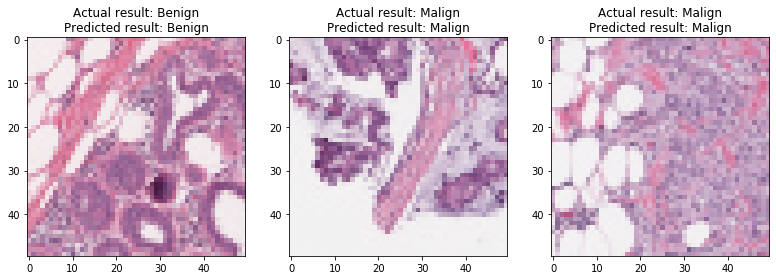

[0, 1, 1]

In [20]:
img_paths = ["./testimages/image544_0.png","./testimages/image4140_1.png", "./testimages/image5493_1.png"]
show_prediction(img_paths)

In [ ]:
get_metrics()